# Aliasing e o teorema da amostragem

Neste notebook exploramos questões a respeito da taxa de amostragem.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})

# Exemplo 1 

Vamos criar um seno, entre 0 [s] e 1[s], com frequência 10 [Hz]. Vamos variar a taxa de amostragem e averiguar o que ocorre.

In [32]:
Fs = 100
time = np.arange(0, 1, 1/Fs)
f_sine = 60
xt = np.cos(2*np.pi*f_sine*time)
N = len(xt) # Num. de amostras no sinal

(-1.0, 1.0)

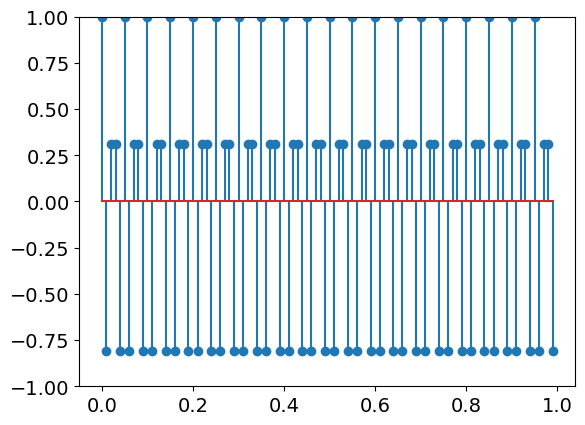

In [33]:
plt.figure()
plt.stem(time, xt)
#plt.plot(time, xt)

plt.ylim((-1,1))

## 1 período do espectro

Vamos calcular o espectro com a FFT e plotar 1 período de espectro. 

Note que o vetor de frequências vai de 0 até bem perto de $F_s$.

A princípio, o espectro tem o mesmo número de amostras do sinal.

xt possui 100 amostras e Xw possui 100 componentes de frequência


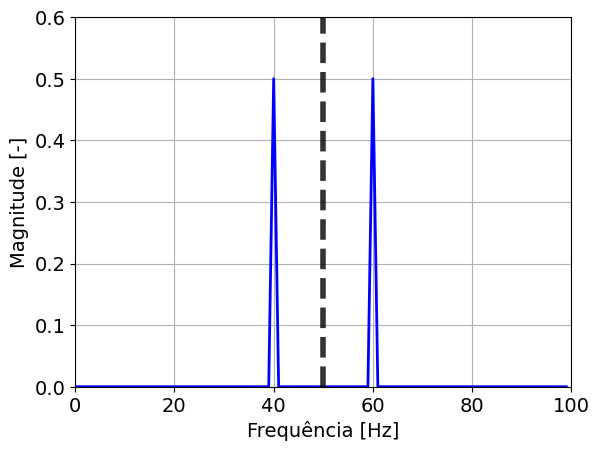

In [34]:
Xw = np.fft.fft(xt) # A princípio, o espectro tem o mesmo número de amostras do sinal
freq = np.linspace(0, (N-1)*Fs/N, N) # 1 período do vetor de frequências vai de 0 até bem perto de Fs.
print("xt possui {} amostras e Xw possui {} componentes de frequência".format(N, len(Xw)))

plt.figure()
plt.plot(freq, np.abs(Xw)/N, 'b', linewidth = 2)
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.8)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((0,Fs))
plt.ylim((0,0.6));

In [15]:
Xw

array([ 3.30481789e-14+0.00000000e+00j, -7.49454854e-14+5.14131663e-15j,
        9.60900659e-15-1.09187982e-13j,  9.38949060e-14+2.04615652e-14j,
       -2.08475949e-15-1.21235634e-14j,  2.64828225e-14+9.42333948e-15j,
        5.22862468e-14-7.22255902e-15j,  3.79417411e-14+2.42822106e-14j,
       -2.35844829e-14+7.02051005e-14j,  1.70107516e-14-4.36334102e-14j,
       -8.44849255e-15+9.67368408e-15j,  5.69154989e-14+3.18441223e-14j,
       -3.80599659e-14-6.64858971e-16j,  3.43606406e-14-1.00113684e-14j,
        2.12244252e-14+5.16142095e-14j, -2.90245293e-14+6.20600513e-15j,
       -3.07349855e-14-3.30321774e-14j,  9.92857588e-14-3.44612505e-14j,
        2.66553319e-14+1.01517637e-13j, -6.77663112e-14+2.09517760e-15j,
        2.09268075e-14-7.10542736e-15j,  1.28076248e-14-2.17931824e-14j,
        2.65841955e-16-3.11548636e-15j,  8.81312368e-14-6.00854484e-15j,
        3.13224430e-14+4.42833834e-14j, -9.31226752e-15+7.32611137e-14j,
        2.94354729e-14-8.43964116e-15j,  1.18955024

## Vários período do espectro

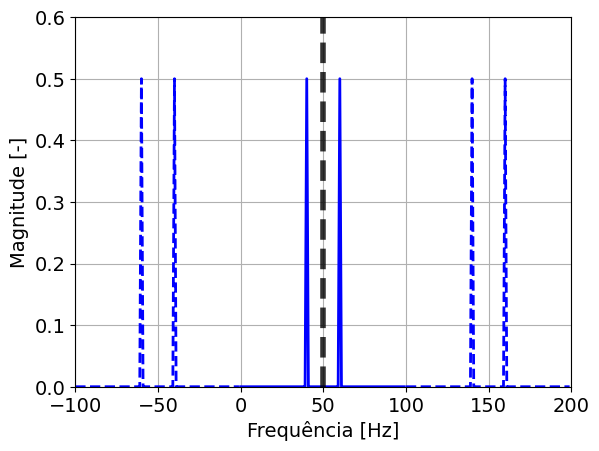

In [36]:
# novo vetor de frequências - 3 períodos
plt.figure()
plt.plot(freq-Fs, np.abs(Xw)/N, '--b', linewidth = 2)
plt.plot(freq, np.abs(Xw)/N, 'b', linewidth = 2)
plt.plot(freq+Fs, np.abs(Xw)/N, '--b', linewidth = 2)
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.8)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((-Fs,2*Fs))
plt.ylim((0,0.6));

C:\Users\Cliente\AppData\Local\Temp\ipykernel_8024\1436359417.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(time, xt, '-b', label = r"$F_s = {}$ [Hz]".format(Fs), basefmt=" ", use_line_collection=  True)


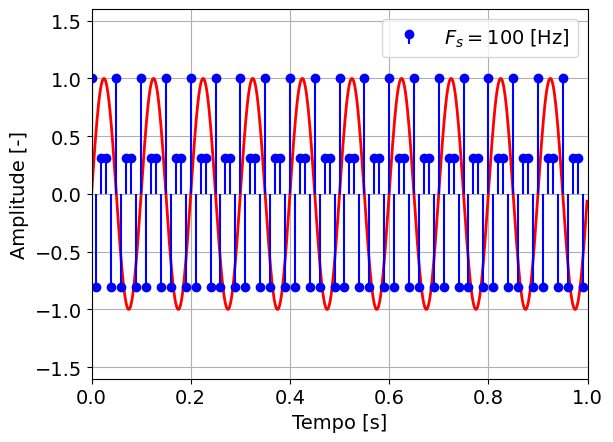

In [37]:
Fs_2 = 1000
time2 = np.arange(0, 1, 1/Fs_2)
xt_2 = np.sin(2*np.pi*10*time2)

plt.figure()
plt.plot(time2, xt_2, 'r', linewidth = 2)
#plt.plot(time, xt, '--b', linewidth = 2)
plt.stem(time, xt, '-b', label = r"$F_s = {}$ [Hz]".format(Fs), basefmt=" ", use_line_collection=  True)
plt.legend(loc = 'upper right')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.grid(which='both', axis='both')
plt.xlim((0,1))
plt.ylim((-1.6,1.6));

# Exemplo 2 - Vamos ouvir um seno com várias taxas de amostragem

In [42]:
import IPython.display as ipd
from scipy import signal

# Gerar sinal com uma taxa de amostragem
fs = 700
t = np.arange(0, 1, 1/fs) # vetor temporal
freq = 500
w = 2*np.pi*freq
xt = np.sin(w*t)

# Reamostrar o sinal para a placa de som conseguir tocá-lo
fs_audio = 44100
xt_play = signal.resample(xt, fs_audio)
ipd.Audio(xt_play, rate=fs_audio) # load a NumPy array

In [12]:
xt_play.shape

(44100,)

# Exemplo 3. Um sinal com 3 senos

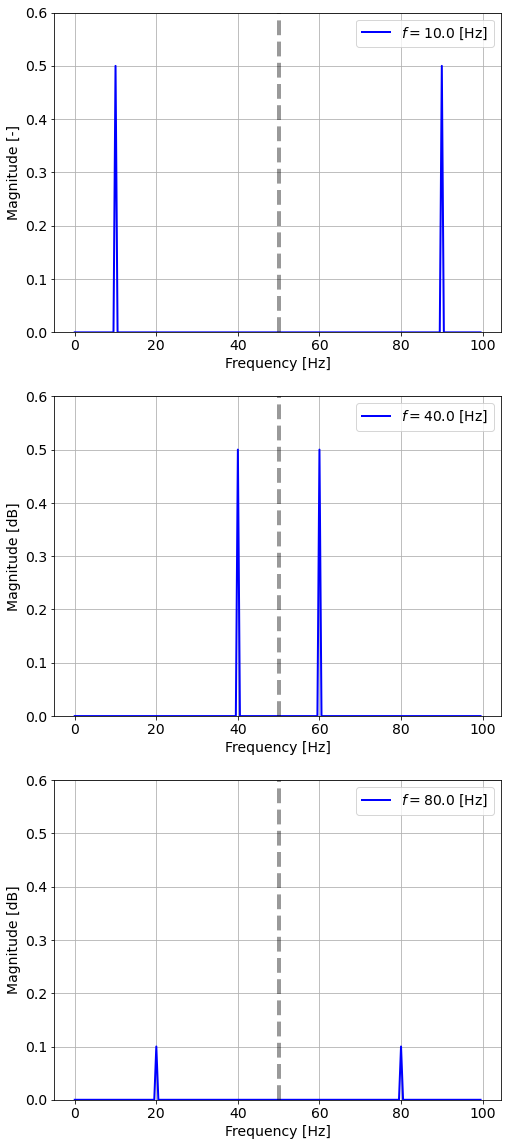

In [12]:
Fs=100
T=2.0;
t=np.arange(0,T,1/Fs)

# 3 sinais com diferentes frequências
f1=10
f2=40
f3=80 #80 e 120

x1=np.sin(2*np.pi*f1*t) 
x2=np.sin(2*np.pi*f2*t)
x3=0.2*np.sin(2*np.pi*f3*t)

# FFT
N=len(t)
X1=np.fft.fft(x1)
X2=np.fft.fft(x2)
X3=np.fft.fft(x3)
freq = np.linspace(0, (N-1)*Fs/N, N)


plt.figure(figsize=(8,20))
plt.subplot(3,1,1)
plt.plot(freq, np.abs(X1)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f1))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [-]')
plt.grid(which='both', axis='both')

plt.subplot(3,1,2)
plt.plot(freq, np.abs(X2)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f2))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')

plt.subplot(3,1,3)
plt.plot(freq, np.abs(X3)/N, 'b', linewidth = 2, label = r"$f = {:.1f}$ [Hz]".format(f3))
plt.axvline(Fs/2, color='k',linestyle = '--', linewidth = 4, alpha = 0.4)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.6))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')